In [53]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [54]:
energies = []
angles = []
cross_sections = []

with open('o16_training.json') as f:

    data = json.load(f)

    points = data['observable_sets'][0]['points']
    
    for point in points:
        energies.append(point['ke_cm_in'])
        angles.append(point['theta_cm_out'])
        cross_sections.append(point['dsdO'])

df = pd.DataFrame(points)
df['dsdO'] = np.log10(df['dsdO'])
heatmap = df.pivot(index='cn_ex', columns='theta_cm_out', values='dsdO')

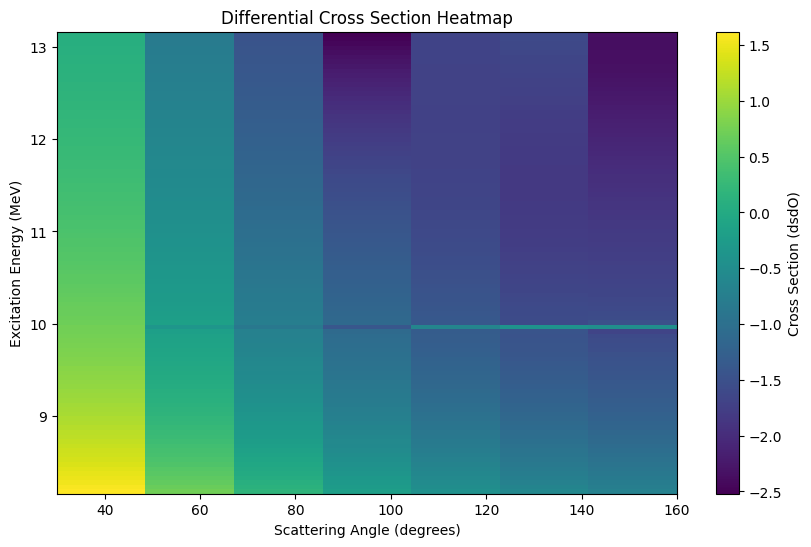

In [55]:
plt.figure(figsize=(10, 6))

plt.imshow(
    heatmap.values,
    origin='lower',
    aspect='auto',
    cmap='viridis',
    extent=[
        heatmap.columns.min(), heatmap.columns.max(),
        heatmap.index.min(), heatmap.index.max()
    ]
)

plt.colorbar(label='Cross Section (dsdO)')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Excitation Energy (MeV)')
plt.title('Differential Cross Section Heatmap')
plt.show()